# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

In [1]:
#Imports
import json
import numpy as np
import zipfile
import os
import pandas as pd
import requests
import io
import shutil
import tempfile
import csv
import matplotlib.pyplot as plt

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

This project aims to analyze two datasets related to COVID-19 in Chicago. The first dataset, retrieved from the City of Chicago's data portal at https://data.cityofchicago.org, contains information about COVID-19 vaccination coverage by ZIP code, including variables such as ZIP code, vaccination count, and population size. This dataset was manually downloaded from the web and then uploaded into the "dataset/data_manually" folder of this project.

The second dataset, also obtained from the City of Chicago's data portal using the programmatically downloading files method from the URL https://data.cityofchicago.org/Health-Human-Services/COVID-19-Cases-Tests-and-Deaths-by-ZIP-Code/yhhz-zm2v/about_data, provides data on COVID-19 cases, tests, and deaths by ZIP code. It includes variables such as weekly cases, cumulative cases, test rates, and death rates. 

*Research question:* How does COVID-19 vaccination coverage relate to the incidence of COVID-19 cases and testing rates across different ZIP codes in Chicago?

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files form a URL

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: CSV File.

Method: using the "Download data manually" method from Kaggle: https://data.cityofchicago.org/Health-Human-Services/COVID-19-Vaccination-Coverage-ZIP-Code/2ani-ic5x/about_data

Dataset variables:
- Variable 1: ZIP Code: The ZIP code of the area.
- Variable 2: Week End: The end date of the week.
- Variable 3: Measure: The measurement metric.
- Variable 4: Season: The season.
- Variable 5: Age Group: The age group.
- Variable 6: Population Size: The size of the population.
- Variable 7: Count: The count.
- Variable 8: Percent: The percentage.
- Variable 9: ZIP Code Centroid: The centroid of the ZIP code.

etc.

In [2]:
#FILL IN 1st data gathering and loading method
data_manually = pd.read_csv('dataset/data_manually/COVID-19_Vaccination_Coverage__ZIP_Code_20240424.csv')
data_manually

,ZIP Code,Week End,Season,Measure,Age Group,Population Size,Count,Percent,ZIP Code Centroid
0,60628,09/23/2023,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.000,POINT (-87.621537 41.694192)
1,60624,09/30/2023,2023-2024,UpToDate_2023_2024,0-17 yrs,10082.0,1,0.000,POINT (-87.722735 41.879417)
2,60645,09/16/2023,2023-2024,UpToDate_2023_2024,18+ yrs,36081.0,23,0.001,POINT (-87.695049 42.008927)
3,60628,09/16/2023,2023-2024,UpToDate_2023_2024,All Ages,62832.0,0,0.000,POINT (-87.621537 41.694192)
4,60606,09/16/2023,2023-2024,UpToDate_2023_2024,18+ yrs,3624.0,7,0.002,POINT (-87.63676 41.882634)
...,...,...,...,...,...,...,...,...,...
9295,60634,04/13/2024,2023-2024,UpToDate_2023_2024,18+ yrs,60436.0,8106,0.134,POINT (-87.797373 41.944967)
9296,60611,03/16/2024,2023-2024,UpToDate_2023_2024,18-64 yrs,28052.0,5744,0.205,POINT (-87.620291 41.894734)
9297,60619,01/13/2024,2023-2024,UpToDate_2023_2024,18-64 yrs,39250.0,2432,0.062,POINT (-87.60569 41.744737)
9298,60642,12/16/2023,2023-2024,UpToDate_2023_2024,18-64 yrs,18062.0,2684,0.149,POINT (-87.657821 41.899935)


#### Dataset 2

Type: CSV File

Method: using the Programmatically downloading files method form a URL https://data.cityofchicago.org/Health-Human-Services/COVID-19-Cases-Tests-and-Deaths-by-ZIP-Code/yhhz-zm2v/about_data

Dataset variables:

- Variable 1: ZIP Code: The ZIP code of the area.
- Variable 2: Week Number: The week number.
- Variable 3: Week Start: The start date of the week.
- Variable 4: Week End: The end date of the week.
- Variable 5: Cases - Weekly: The number of cases reported for the week.
- Variable 6: Cases - Cumulative: The cumulative number of cases.
- Variable 7: Case Rate - Weekly: The weekly case rate.
- Variable 8: Case Rate - Cumulative: The cumulative case rate.
- Variable 9: Tests - Weekly: The number of tests conducted for the week.
- Variable 10: Tests - Cumulative: The cumulative number of tests conducted.
- Variable 11: Test Rate - Weekly: The weekly test rate.
- Variable 12: Test Rate - Cumulative: The cumulative test rate.
- Variable 13: Percent Tested Positive - Weekly: The percentage of positive tests for the week.
- Variable 14: Percent Tested Positive - Cumulative: The cumulative percentage of positive tests.
- Variable 15: Deaths - Weekly: The number of deaths reported for the week.
- Variable 16: Deaths - Cumulative: The cumulative number of deaths.
- Variable 17: Death Rate - Weekly: The weekly death rate.
- Variable 18: Death Rate - Cumulative: The cumulative death rate.
- Variable 19: Population: The population size.
- Variable 20: Row ID: The row ID.
- Variable 21: ZIP Code Location: The location of the ZIP code.

etc.

In [3]:
# URL of the data
url = 'https://data.cityofchicago.org/api/views/yhhz-zm2v/rows.csv?accessType=DOWNLOAD'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open a CSV file to write the data
    with open('dataset/data_URL/COVID-19_by_ZIP_Code_from_URL.csv', 'wb') as f:
        # Write the data from the request to the CSV file
        f.write(response.content)
    print("Data downloaded successfully and saved to 'dataset/data_URL/COVID-19_by_ZIP_Code_from_URL.csv' file.")
else:
    print("Failed to download data from the URL.")

Data downloaded successfully and saved to 'dataset/data_URL/COVID-19_by_ZIP_Code_from_URL.csv' file.


In [4]:
#FILL IN 1st data gathering and loading method
data_URL = pd.read_csv('dataset/data_URL/COVID-19_by_ZIP_Code_from_URL.csv')
data_URL

,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
0,60612,52,12/26/2021,01/01/2022,743.0,6287.0,2166.0,18323.6,3628.0,141906,...,413587.5,0.2,0.1,2,83,5.8,241.9,34311,60612-2021-52,POINT (-87.687011 41.88004)
1,60612,1,01/02/2022,01/08/2022,603.0,6890.0,1758.0,20081.0,4423.0,146329,...,426478.4,0.2,0.1,6,89,17.5,259.4,34311,60612-2022-1,POINT (-87.687011 41.88004)
2,60612,14,04/03/2022,04/09/2022,31.0,7670.0,90.0,22354.3,2121.0,181657,...,529442.5,0.0,0.0,0,101,0.0,294.4,34311,60612-2022-14,POINT (-87.687011 41.88004)
3,60612,17,04/24/2022,04/30/2022,82.0,7852.0,239.0,22884.8,2427.0,187641,...,546882.9,0.0,0.0,0,101,0.0,294.4,34311,60612-2022-17,POINT (-87.687011 41.88004)
4,60612,18,05/01/2022,05/07/2022,86.0,7938.0,251.0,23135.4,2426.0,190067,...,553953.5,0.0,0.0,0,101,0.0,294.4,34311,60612-2022-18,POINT (-87.687011 41.88004)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,60645,1,12/31/2023,01/06/2024,71.0,15117.0,149.0,31670.6,33.0,297712,...,623715.7,0.3,0.1,0,161,0.0,337.3,47732,60645-2023-1,POINT (-87.695049 42.008927)
12888,60646,1,12/31/2023,01/06/2024,24.0,9387.0,86.0,33540.6,16.0,156363,...,558698.7,0.3,0.1,1,106,3.6,378.7,27987,60646-2023-1,POINT (-87.761826 41.993931)
12889,60647,1,12/31/2023,01/06/2024,41.0,24925.0,47.0,28482.8,18.0,478684,...,547011.2,0.3,0.1,0,198,0.0,226.3,87509,60647-2023-1,POINT (-87.701101 41.921058)
12890,60707,1,12/31/2023,01/06/2024,14.0,6169.0,32.0,14340.2,NaN,4415,...,10262.9,0.0,0.1,0,67,0.0,155.7,43019,60707-2023-1,POINT (-87.808283 41.921777)


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

 The datasets can be merged based on the common column "ZIP Code," which serves as a key identifier for geographic areas. This common column facilitates the integration of data from both datasets, allowing for a more cohesive analysis.

In [5]:
merged_data = pd.merge(data_manually, data_URL, on='ZIP Code', how='inner')
# merged_data.to_csv('dataset/merged_data.csv', index=False)

In [6]:
merged_data

,ZIP Code,Week End_x,Season,Measure,Age Group,Population Size,Count,Percent,ZIP Code Centroid,Week Number,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
0,60628,09/23/2023,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.0,POINT (-87.621537 41.694192),15,...,508996.8,0.0,0.1,1,324,1.5,485.6,66724,60628-2023-15,POINT (-87.621537 41.694192)
1,60628,09/23/2023,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.0,POINT (-87.621537 41.694192),16,...,511586.5,0.0,0.1,0,324,0.0,485.6,66724,60628-2023-16,POINT (-87.621537 41.694192)
2,60628,09/23/2023,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.0,POINT (-87.621537 41.694192),17,...,514192.8,0.0,0.1,0,324,0.0,485.6,66724,60628-2023-17,POINT (-87.621537 41.694192)
3,60628,09/23/2023,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.0,POINT (-87.621537 41.694192),18,...,516760.1,0.0,0.0,0,324,0.0,485.6,66724,60628-2023-18,POINT (-87.621537 41.694192)
4,60628,09/23/2023,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.0,POINT (-87.621537 41.694192),19,...,519092.1,0.0,0.0,0,324,0.0,485.6,66724,60628-2023-19,POINT (-87.621537 41.694192)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998255,Unknown,03/23/2024,2023-2024,UpToDate_2023_2024,18+ yrs,NaN,779,NaN,NaN,30,...,0.0,0.0,0.1,0,13,0.0,0.0,0,Unknown-2023-30,NaN
1998256,Unknown,03/23/2024,2023-2024,UpToDate_2023_2024,18+ yrs,NaN,779,NaN,NaN,31,...,0.0,0.1,0.1,0,13,0.0,0.0,0,Unknown-2023-31,NaN
1998257,Unknown,03/23/2024,2023-2024,UpToDate_2023_2024,18+ yrs,NaN,779,NaN,NaN,32,...,0.0,0.2,0.1,0,13,0.0,0.0,0,Unknown-2023-32,NaN
1998258,Unknown,03/23/2024,2023-2024,UpToDate_2023_2024,18+ yrs,NaN,779,NaN,NaN,33,...,0.0,0.1,0.1,0,13,0.0,0.0,0,Unknown-2023-33,NaN


### Quality Issue 1:

In [7]:
#FILL IN - Inspecting the dataframe
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998260 entries, 0 to 1998259
Data columns (total 29 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   ZIP Code                              object 
 1   Week End_x                            object 
 2   Season                                object 
 3   Measure                               object 
 4   Age Group                             object 
 5   Population Size                       float64
 6   Count                                 int64  
 7   Percent                               float64
 8   ZIP Code Centroid                     object 
 9   Week Number                           int64  
 10  Week Start                            object 
 11  Week End_y                            object 
 12  Cases - Weekly                        float64
 13  Cases - Cumulative                    float64
 14  Case Rate - Weekly                    float64
 15  Case Rate - Cum

### Issue and justification:

The 'Week End_x' 'Week Start' and 'Week End_y' columns in merged data are currently stored as object data types, but they should be in datetime format for accurate date-based analysis.

Storing dates as objects may lead to inaccuracies in date-based operations such as sorting, filtering, and time series analysis. Converting these columns to datetime format will ensure consistency and precision in handling dates, enabling more reliable analysis and visualization of temporal trends. Moreover, datetime format allows for easier calculation of time intervals and comparisons between dates, enhancing the overall data analysis process.

The 'Cases - Weekly', 'Cases - Cumulative', and 'Tests - Weekly' columns are currently stored as float64 data types, but they should be integers. These columns represent counts of cases and tests, which are inherently whole numbers. Storing them as float64 may introduce unnecessary decimal precision, leading to potential rounding errors or inconsistencies in calculations. Converting these columns to integers will not only improve data accuracy but also optimize memory usage, making the dataset more efficient for analysis and interpretation.

### Quality Issue 2:

In [8]:
#FILL IN - Inspecting the dataframe
# Check for missing values in the dataframe
missing_values_merged = merged_data.isnull().sum()
missing_values_merged

ZIP Code                                    0
Week End_x                                  0
Season                                      0
Measure                                     0
Age Group                                   0
Population Size                         65410
Count                                       0
Percent                                 65410
ZIP Code Centroid                       32085
Week Number                                 0
Week Start                                  0
Week End_y                                  0
Cases - Weekly                          34565
Cases - Cumulative                      34565
Case Rate - Weekly                      34565
Case Rate - Cumulative                  34565
Tests - Weekly                          59520
Tests - Cumulative                          0
Test Rate - Weekly                          0
Test Rate - Cumulative                      0
Percent Tested Positive - Weekly            0
Percent Tested Positive - Cumulati

In [9]:
# Calculate the percentage of missing values in the "Population Size" column
is_null_population_size = merged_data["Population Size"].isnull().sum() / merged_data.shape[0]
print("Percentage of missing values in Population Size column:", is_null_population_size)

# Calculate the percentage of missing values in the "Percent" column
is_null_percent = merged_data["Percent"].isnull().sum() / merged_data.shape[0]
print("Percentage of missing values in Percent column:", is_null_percent)

# Calculate the percentage of missing values in the "ZIP Code Centroid" column
is_null_ZIP_code_centroid = merged_data["ZIP Code Centroid"].isnull().sum() / merged_data.shape[0]
print("Percentage of missing values in ZIP Code Centroid column:", is_null_ZIP_code_centroid)

# Calculate the percentage of missing values in the "Cases - Weekly" column
is_null_population_size = merged_data["Cases - Weekly"].isnull().sum() / merged_data.shape[0]
print("Percentage of missing values in Cases - Weekly column:", is_null_population_size)

# Calculate the percentage of missing values in the "Cases - Cumulative" column
is_null_population_size = merged_data["Cases - Cumulative"].isnull().sum() / merged_data.shape[0]
print("Percentage of missing values in Cases - Cumulative column:", is_null_population_size)

# Calculate the percentage of missing values in the "Case Rate - Weekly" column
is_null_population_size = merged_data["Case Rate - Weekly"].isnull().sum() / merged_data.shape[0]
print("Percentage of missing values in Case Rate - Weekly column:", is_null_population_size)

# Calculate the percentage of missing values in the "Case Rate - Cumulative" column
is_null_population_size = merged_data["Case Rate - Cumulative"].isnull().sum() / merged_data.shape[0]
print("Percentage of missing values in Case Rate - Cumulative column:", is_null_population_size)

# Calculate the percentage of missing values in the "Tests - Weekly" column
is_null_population_size = merged_data["Tests - Weekly"].isnull().sum() / merged_data.shape[0]
print("Percentage of missing values in Tests - Weekly column:", is_null_population_size)

# Calculate the percentage of missing values in the "ZIP Code Location" column
is_null_population_size = merged_data["ZIP Code Location"].isnull().sum() / merged_data.shape[0]
print("Percentage of missing values in ZIP Code Location column:", is_null_population_size)

Percentage of missing values in Population Size column: 0.03273347812596959
Percentage of missing values in Percent column: 0.03273347812596959
Percentage of missing values in ZIP Code Centroid column: 0.016056469128141484
Percentage of missing values in Cases - Weekly column: 0.017297548867514737
Percentage of missing values in Cases - Cumulative column: 0.017297548867514737
Percentage of missing values in Case Rate - Weekly column: 0.017297548867514737
Percentage of missing values in Case Rate - Cumulative column: 0.017297548867514737
Percentage of missing values in Tests - Weekly column: 0.029785913744958113
Percentage of missing values in ZIP Code Location column: 0.016056469128141484


Issue and Justification:

- Missing Values in Population Size and Percent Columns:
Issue: There are missing values in the Population Size and Percent columns, accounting for approximately 3.27% of the total data.
Justification: Missing values in these columns can impact the accuracy of population-related analyses and percentage calculations. It's crucial to address these missing values to ensure the integrity of the data and the validity of any subsequent analysis or interpretation.
- Missing Values in ZIP Code Centroid and ZIP Code Location Columns:
Issue: The ZIP Code Centroid and ZIP Code Location columns also contain missing values, constituting around 1.61% of the dataset.
Justification: These columns are essential for geographic analysis and visualization. Missing values in these columns may affect the accuracy of mapping or geographical representations derived from the dataset. It's important to handle these missing values to maintain the spatial integrity of the data.
- Missing Values in Cases, Case Rate, and Tests Columns:
Issue: The Cases - Weekly, Cases - Cumulative, Case Rate - Weekly, Case Rate - Cumulative, and Tests - Weekly columns have missing values, with approximately 1.73% to 2.98% of the data being affected.
Justification: Missing values in these columns can impact the analysis of COVID-19 cases, case rates, and testing trends. Addressing these missing values is crucial for accurate assessment and monitoring of the pandemic situation, especially in geographical areas represented by ZIP codes.

### Tidiness Issue 1:

In [10]:
merged_data.head()

,ZIP Code,Week End_x,Season,Measure,Age Group,Population Size,Count,Percent,ZIP Code Centroid,Week Number,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
0,60628,09/23/2023,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.0,POINT (-87.621537 41.694192),15,...,508996.8,0.0,0.1,1,324,1.5,485.6,66724,60628-2023-15,POINT (-87.621537 41.694192)
1,60628,09/23/2023,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.0,POINT (-87.621537 41.694192),16,...,511586.5,0.0,0.1,0,324,0.0,485.6,66724,60628-2023-16,POINT (-87.621537 41.694192)
2,60628,09/23/2023,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.0,POINT (-87.621537 41.694192),17,...,514192.8,0.0,0.1,0,324,0.0,485.6,66724,60628-2023-17,POINT (-87.621537 41.694192)
3,60628,09/23/2023,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.0,POINT (-87.621537 41.694192),18,...,516760.1,0.0,0.0,0,324,0.0,485.6,66724,60628-2023-18,POINT (-87.621537 41.694192)
4,60628,09/23/2023,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.0,POINT (-87.621537 41.694192),19,...,519092.1,0.0,0.0,0,324,0.0,485.6,66724,60628-2023-19,POINT (-87.621537 41.694192)


#### Issues and Justification:

- There is redundancy in the dataset with columns 'ZIP Code Centroid' and 'ZIP Code Location'. Therefore, one of these columns needs to be removed. This redundancy could potentially complicate analysis and visualization.
- The 'Population Size' column segmented by age group is redundant since there is already a 'Population' column representing the total population for each ZIP Code.
- When using data merge to aggregate average quantities, columns such as 'Age Group', 'Week Number', 'Week Start', 'Week End', and 'Row ID' are unnecessary and can be considered redundant. These columns should be removed.

### Tidiness Issue 2: 

In [11]:
#FILL IN - Inspecting the dataframe
merged_data.head()

,ZIP Code,Week End_x,Season,Measure,Age Group,Population Size,Count,Percent,ZIP Code Centroid,Week Number,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
0,60628,09/23/2023,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.0,POINT (-87.621537 41.694192),15,...,508996.8,0.0,0.1,1,324,1.5,485.6,66724,60628-2023-15,POINT (-87.621537 41.694192)
1,60628,09/23/2023,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.0,POINT (-87.621537 41.694192),16,...,511586.5,0.0,0.1,0,324,0.0,485.6,66724,60628-2023-16,POINT (-87.621537 41.694192)
2,60628,09/23/2023,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.0,POINT (-87.621537 41.694192),17,...,514192.8,0.0,0.1,0,324,0.0,485.6,66724,60628-2023-17,POINT (-87.621537 41.694192)
3,60628,09/23/2023,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.0,POINT (-87.621537 41.694192),18,...,516760.1,0.0,0.0,0,324,0.0,485.6,66724,60628-2023-18,POINT (-87.621537 41.694192)
4,60628,09/23/2023,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.0,POINT (-87.621537 41.694192),19,...,519092.1,0.0,0.0,0,324,0.0,485.6,66724,60628-2023-19,POINT (-87.621537 41.694192)


#### Issues and Justification:

The merged data appears to contain redundancy, with multiple rows for the same ZIP Code. It is necessary to aggregate data for each ZIP code to reduce redundancy and simplify the dataset for analysis. Therefore, merging rows with the same ZIP code is required to streamline the data and make it more concise and straightforward for analysis.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [12]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes are not impacted
merged_data_copy = merged_data.copy()

### **Quality Issue 1: Wrong data type**

Issue and justification:

The 'Week End' column in dataset1 and the 'Week Start' and 'Week End' columns in dataset2 are currently stored as object data types, but they should be in datetime format for accurate date-based analysis.

Storing dates as objects may lead to inaccuracies in date-based operations such as sorting, filtering, and time series analysis. Converting these columns to datetime format will ensure consistency and precision in handling dates, enabling more reliable analysis and visualization of temporal trends. Moreover, datetime format allows for easier calculation of time intervals and comparisons between dates, enhancing the overall data analysis process.

The 'Cases - Weekly', 'Cases - Cumulative', and 'Tests - Weekly' columns in dataset2 are currently stored as float64 data types, but they should be integers.

These columns represent counts of cases and tests, which are inherently whole numbers. Storing them as float64 may introduce unnecessary decimal precision, leading to potential rounding errors or inconsistencies in calculations. Converting these columns to integers will not only improve data accuracy but also optimize memory usage, making the dataset more efficient for analysis and interpretation.

In [13]:
# FILL IN - Apply the cleaning strategy
merged_data_copy['Week End_x'] = pd.to_datetime(merged_data_copy['Week End_x'], errors='coerce')
merged_data_copy['Week End_y'] = pd.to_datetime(merged_data_copy['Week End_y'], errors='coerce')
merged_data_copy['Week Start'] = pd.to_datetime(merged_data_copy['Week Start'], errors='coerce')

merged_data_copy.dropna(inplace=True)
merged_data_copy['Cases - Weekly'] = merged_data_copy['Cases - Weekly'].astype('int64')
merged_data_copy['Cases - Cumulative'] = merged_data_copy['Cases - Cumulative'].astype('int64')
merged_data_copy['Tests - Weekly'] = merged_data_copy['Tests - Weekly'].astype('int64')

In [14]:
# Validate the cleaning was successful
merged_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852715 entries, 0 to 1966174
Data columns (total 29 columns):
 #   Column                                Dtype         
---  ------                                -----         
 0   ZIP Code                              object        
 1   Week End_x                            datetime64[ns]
 2   Season                                object        
 3   Measure                               object        
 4   Age Group                             object        
 5   Population Size                       float64       
 6   Count                                 int64         
 7   Percent                               float64       
 8   ZIP Code Centroid                     object        
 9   Week Number                           int64         
 10  Week Start                            datetime64[ns]
 11  Week End_y                            datetime64[ns]
 12  Cases - Weekly                        int64         
 13  Cases - Cumu

#### Justification:

The 'Week End' column in dataset1 and the 'Week Start' and 'Week End' columns in dataset2 are currently represented as datetime data type.

The 'Cases - Weekly', 'Cases - Cumulative', and 'Tests - Weekly' columns in dataset2 are currently stored as integers data types.

### **Quality Issue 2: Non value**

Issue and Justification:

1. Missing Values in Population Size and Percent Columns: 

- Issue: There are missing values in the Population Size and Percent columns, accounting for approximately 3.27% of the total data. 

- Justification: Missing values in these columns can impact the accuracy of population-related analyses and percentage calculations. It's crucial to address these missing values to ensure the integrity of the data and the validity of any subsequent analysis or interpretation.
2. Missing Values in ZIP Code Centroid and ZIP Code Location Columns: 

- Issue: The ZIP Code Centroid and ZIP Code Location columns also contain missing values, constituting around 1.61% of the dataset. 

- Justification: These columns are essential for geographic analysis and visualization. Missing values in these columns may affect the accuracy of mapping or geographical representations derived from the dataset. It's important to handle these missing values to maintain the spatial integrity of the data.
3. Missing Values in Cases, Case Rate, and Tests Columns: 

- Issue: The Cases - Weekly, Cases - Cumulative, Case Rate - Weekly, Case Rate - Cumulative, and Tests - Weekly columns have missing values, with approximately 1.73% to 2.98% of the data being affected. 

- Justification: Missing values in these columns can impact the analysis of COVID-19 cases, case rates, and testing trends. Addressing these missing values is crucial for accurate assessment and monitoring of the pandemic situation, especially in geographical areas represented by ZIP codes.

In [15]:
# Fill missing values in dataset1
merged_data_copy['Population Size'].fillna(merged_data_copy['Population Size'].median(), inplace=True)
merged_data_copy['Percent'].fillna(merged_data_copy['Percent'].median(), inplace=True)
merged_data_copy['ZIP Code Centroid'].fillna(merged_data_copy['ZIP Code Centroid'].mode()[0], inplace=True)
merged_data_copy['Cases - Weekly'].fillna(merged_data_copy['Cases - Weekly'].median(), inplace=True)
merged_data_copy['Cases - Cumulative'].fillna(merged_data_copy['Cases - Cumulative'].median(), inplace=True)
merged_data_copy['Case Rate - Weekly'].fillna(merged_data_copy['Case Rate - Weekly'].median(), inplace=True)
merged_data_copy['Case Rate - Cumulative'].fillna(merged_data_copy['Case Rate - Cumulative'].median(), inplace=True)
merged_data_copy['Tests - Weekly'].fillna(merged_data_copy['Tests - Weekly'].median(), inplace=True)
merged_data_copy['ZIP Code Location'].fillna(merged_data_copy['ZIP Code Location'].mode()[0], inplace=True)

In [16]:
#FILL IN - Validate the cleaning was successful
merged_data_copy.isna().sum()

ZIP Code                                0
Week End_x                              0
Season                                  0
Measure                                 0
Age Group                               0
Population Size                         0
Count                                   0
Percent                                 0
ZIP Code Centroid                       0
Week Number                             0
Week Start                              0
Week End_y                              0
Cases - Weekly                          0
Cases - Cumulative                      0
Case Rate - Weekly                      0
Case Rate - Cumulative                  0
Tests - Weekly                          0
Tests - Cumulative                      0
Test Rate - Weekly                      0
Test Rate - Cumulative                  0
Percent Tested Positive - Weekly        0
Percent Tested Positive - Cumulative    0
Deaths - Weekly                         0
Deaths - Cumulative               

### **Tidiness Issue 1: Redundant Columns in Merged Dataset**

Issues and Justification:

There is redundancy in the dataset with columns 'ZIP Code Centroid' and 'ZIP Code Location'. Therefore, one of these columns needs to be removed. This redundancy could potentially complicate analysis and visualization.

The 'Population Size' column segmented by age group is redundant since there is already a 'Population' column representing the total population for each ZIP Code.

When using data merge to aggregate average quantities, columns such as 'Age Group', 'Week Number', 'Week Start', 'Week End', 'Percent', 'Count' and 'Row ID' are unnecessary and can be considered redundant. These columns should be removed.

In [17]:
merged_data_copy

,ZIP Code,Week End_x,Season,Measure,Age Group,Population Size,Count,Percent,ZIP Code Centroid,Week Number,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
0,60628,2023-09-23,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.000,POINT (-87.621537 41.694192),15,...,508996.8,0.0,0.1,1,324,1.5,485.6,66724,60628-2023-15,POINT (-87.621537 41.694192)
1,60628,2023-09-23,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.000,POINT (-87.621537 41.694192),16,...,511586.5,0.0,0.1,0,324,0.0,485.6,66724,60628-2023-16,POINT (-87.621537 41.694192)
2,60628,2023-09-23,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.000,POINT (-87.621537 41.694192),17,...,514192.8,0.0,0.1,0,324,0.0,485.6,66724,60628-2023-17,POINT (-87.621537 41.694192)
3,60628,2023-09-23,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.000,POINT (-87.621537 41.694192),18,...,516760.1,0.0,0.0,0,324,0.0,485.6,66724,60628-2023-18,POINT (-87.621537 41.694192)
4,60628,2023-09-23,2023-2024,UpToDate_2023_2024,0-17 yrs,13786.0,3,0.000,POINT (-87.621537 41.694192),19,...,519092.1,0.0,0.0,0,324,0.0,485.6,66724,60628-2023-19,POINT (-87.621537 41.694192)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966170,60654,2024-04-06,2023-2024,UpToDate_2023_2024,18+ yrs,22630.0,4546,0.201,POINT (-87.636354 41.892485),9,...,534397.7,0.1,0.1,0,9,0.0,47.0,19135,60654-2023-9,POINT (-87.636354 41.892485)
1966171,60654,2024-04-06,2023-2024,UpToDate_2023_2024,18+ yrs,22630.0,4546,0.201,POINT (-87.636354 41.892485),9,...,0.0,0.0,0.0,0,9,0.0,47.0,19135,60654-2024-9,POINT (-87.636354 41.892485)
1966172,60654,2024-04-06,2023-2024,UpToDate_2023_2024,18+ yrs,22630.0,4546,0.201,POINT (-87.636354 41.892485),10,...,0.0,0.0,0.0,0,9,0.0,47.0,19135,60654-2024-10,POINT (-87.636354 41.892485)
1966173,60654,2024-04-06,2023-2024,UpToDate_2023_2024,18+ yrs,22630.0,4546,0.201,POINT (-87.636354 41.892485),11,...,0.0,0.0,0.0,0,9,0.0,47.0,19135,60654-2024-11,POINT (-87.636354 41.892485)


In [18]:
merged_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852715 entries, 0 to 1966174
Data columns (total 29 columns):
 #   Column                                Dtype         
---  ------                                -----         
 0   ZIP Code                              object        
 1   Week End_x                            datetime64[ns]
 2   Season                                object        
 3   Measure                               object        
 4   Age Group                             object        
 5   Population Size                       float64       
 6   Count                                 int64         
 7   Percent                               float64       
 8   ZIP Code Centroid                     object        
 9   Week Number                           int64         
 10  Week Start                            datetime64[ns]
 11  Week End_y                            datetime64[ns]
 12  Cases - Weekly                        int64         
 13  Cases - Cumu

In [19]:
#FILL IN - Apply the cleaning strategy
# Drop redundant columns
merged_data_cleaned = merged_data_copy.drop(['ZIP Code Location', 'Population Size', 'Age Group', 'Week Number', 'Week Start', 'Row ID', 'Week End_x', 'Week End_y', 'Count'], axis=1)

In [20]:
#FILL IN - Validate the cleaning was successful
merged_data_cleaned

,ZIP Code,Season,Measure,Percent,ZIP Code Centroid,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,Test Rate - Weekly,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population
0,60628,2023-2024,UpToDate_2023_2024,0.000,POINT (-87.621537 41.694192),30,16448,45.0,24650.8,1725,339623,2585,508996.8,0.0,0.1,1,324,1.5,485.6,66724
1,60628,2023-2024,UpToDate_2023_2024,0.000,POINT (-87.621537 41.694192),24,16472,36.0,24686.8,1728,341351,2590,511586.5,0.0,0.1,0,324,0.0,485.6,66724
2,60628,2023-2024,UpToDate_2023_2024,0.000,POINT (-87.621537 41.694192),32,16504,48.0,24734.7,1739,343090,2606,514192.8,0.0,0.1,0,324,0.0,485.6,66724
3,60628,2023-2024,UpToDate_2023_2024,0.000,POINT (-87.621537 41.694192),28,16532,42.0,24776.7,1713,344803,2567,516760.1,0.0,0.0,0,324,0.0,485.6,66724
4,60628,2023-2024,UpToDate_2023_2024,0.000,POINT (-87.621537 41.694192),32,16564,48.0,24824.7,1556,346359,2332,519092.1,0.0,0.0,0,324,0.0,485.6,66724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966170,60654,2023-2024,UpToDate_2023_2024,0.201,POINT (-87.636354 41.892485),20,5926,104.0,30969.4,190,102257,993,534397.7,0.1,0.1,0,9,0.0,47.0,19135
1966171,60654,2023-2024,UpToDate_2023_2024,0.201,POINT (-87.636354 41.892485),5,6254,26.0,32683.6,0,0,0,0.0,0.0,0.0,0,9,0.0,47.0,19135
1966172,60654,2023-2024,UpToDate_2023_2024,0.201,POINT (-87.636354 41.892485),8,6262,42.0,32725.4,0,0,0,0.0,0.0,0.0,0,9,0.0,47.0,19135
1966173,60654,2023-2024,UpToDate_2023_2024,0.201,POINT (-87.636354 41.892485),2,6264,10.0,32735.8,0,0,0,0.0,0.0,0.0,0,9,0.0,47.0,19135


### **Tidiness Issue 2: Redundant Rows Based on ZIP Code**

Issues and Justification:

The merged data appears to contain redundancy, with multiple rows for the same ZIP Code. It is necessary to aggregate data for each ZIP code to reduce redundancy and simplify the dataset for analysis. Therefore, merging rows with the same ZIP code is required to streamline the data and make it more concise and straightforward for analysis.

In [21]:
merged_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852715 entries, 0 to 1966174
Data columns (total 20 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   ZIP Code                              object 
 1   Season                                object 
 2   Measure                               object 
 3   Percent                               float64
 4   ZIP Code Centroid                     object 
 5   Cases - Weekly                        int64  
 6   Cases - Cumulative                    int64  
 7   Case Rate - Weekly                    float64
 8   Case Rate - Cumulative                float64
 9   Tests - Weekly                        int64  
 10  Tests - Cumulative                    int64  
 11  Test Rate - Weekly                    int64  
 12  Test Rate - Cumulative                float64
 13  Percent Tested Positive - Weekly      float64
 14  Percent Tested Positive - Cumulative  float64
 15  Deaths - Weekly

In [22]:
#FILL IN - Apply the cleaning strategy
# Group by the specified columns and calculate the mean for other columns
merged_data_cleaned_mean = merged_data_cleaned.groupby(['ZIP Code', 'Season', 'Measure', 'ZIP Code Centroid', 'Population']).mean().reset_index()

In [23]:
#FILL IN - Validate the cleaning was successful
merged_data_cleaned_mean

,ZIP Code,Season,Measure,ZIP Code Centroid,Population,Percent,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,Test Rate - Weekly,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative
0,60601,2023-2024,UpToDate_2023_2024,POINT (-87.622844 41.886262),14675,0.218697,27.253521,3278.169014,185.704225,22338.457746,493.953052,58529.338028,3365.920188,3.988371e+05,0.066667,0.065728,0.070423,11.657277,0.478873,79.446479
1,60602,2023-2024,UpToDate_2023_2024,POINT (-87.628309 41.883136),1244,0.380619,2.416268,289.712919,194.191388,23288.818182,60.186603,6862.602871,4838.133971,5.516562e+05,0.066986,0.027273,0.014354,2.267943,1.154067,182.342584
2,60603,2023-2024,UpToDate_2023_2024,POINT (-87.625473 41.880112),1174,0.312710,2.200000,252.931707,187.341463,21544.436585,58.873171,6721.302439,5014.751220,5.725130e+05,0.059512,0.011220,0.000000,0.000000,0.000000,0.000000
3,60604,2023-2024,UpToDate_2023_2024,POINT (-87.629029 41.878153),782,0.403284,2.403846,289.024038,307.514423,36959.597596,76.451923,8845.336538,9776.466346,1.131117e+06,0.041346,0.028365,0.000000,0.000000,0.000000,0.000000
4,60605,2023-2024,UpToDate_2023_2024,POINT (-87.623449 41.867824),27519,0.220090,37.577465,4500.061033,136.516432,16352.562441,658.065728,77388.610329,2391.300469,2.812188e+05,0.063850,0.061502,0.075117,11.816901,0.270423,42.935211
5,60606,2023-2024,UpToDate_2023_2024,POINT (-87.63676 41.882634),3101,0.276097,6.180095,732.350711,199.232227,23616.597630,163.853081,18900.379147,5283.876777,6.094930e+05,0.055924,0.061137,0.052133,6.085308,1.678673,196.208057
6,60607,2023-2024,UpToDate_2023_2024,POINT (-87.652727 41.876104),29591,0.194903,45.333333,5591.868545,153.239437,18897.195775,918.685446,107866.859155,3104.615023,3.645259e+05,0.056808,0.049765,0.093897,13.112676,0.319249,44.295775
7,60608,2023-2024,UpToDate_2023_2024,POINT (-87.670366 41.849879),79205,0.114445,101.962441,13358.305164,128.694836,16865.487324,1876.478873,205176.943662,2369.117371,2.590454e+05,0.058216,0.105164,0.967136,160.492958,1.228169,202.628169
8,60609,2023-2024,UpToDate_2023_2024,POINT (-87.653382 41.812017),61495,0.081413,85.488263,11390.812207,138.990610,18523.149296,1639.150235,169235.812207,2665.507042,2.752026e+05,0.059155,0.109390,1.098592,177.281690,1.786385,288.288263
9,60610,2023-2024,UpToDate_2023_2024,POINT (-87.63581 41.90455),39019,0.188297,56.443925,6943.953271,144.630841,17796.339252,1085.130841,123236.247664,2780.995327,3.158365e+05,0.056075,0.074299,0.299065,41.785047,0.771963,107.089252


Justification: 

*By grouping the data based on ZIP Code, Season, Measure, ZIP Code Centroid, and Population, and calculating the mean for other columns, we effectively aggregate redundant rows with the same ZIP Code. This cleaning strategy reduces redundancy and simplifies the dataset for analysis. Aggregating the data in this way allows us to maintain the integrity of the dataset while ensuring that each ZIP code is represented by a single row, making the data more concise and straightforward for analysis. Additionally, calculating the mean for numerical columns provides a representative value for each ZIP code, which can be useful for further analysis and interpretation. Overall, this cleaning strategy helps streamline the dataset and improve its usability for analytical purposes.*

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

*We have completed the merging of the two datasets and performed data cleaning to remove unnecessary variables and streamline the dataset in the Clean data step.*

In [24]:
merged_data_cleaned_mean

,ZIP Code,Season,Measure,ZIP Code Centroid,Population,Percent,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,Test Rate - Weekly,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative
0,60601,2023-2024,UpToDate_2023_2024,POINT (-87.622844 41.886262),14675,0.218697,27.253521,3278.169014,185.704225,22338.457746,493.953052,58529.338028,3365.920188,3.988371e+05,0.066667,0.065728,0.070423,11.657277,0.478873,79.446479
1,60602,2023-2024,UpToDate_2023_2024,POINT (-87.628309 41.883136),1244,0.380619,2.416268,289.712919,194.191388,23288.818182,60.186603,6862.602871,4838.133971,5.516562e+05,0.066986,0.027273,0.014354,2.267943,1.154067,182.342584
2,60603,2023-2024,UpToDate_2023_2024,POINT (-87.625473 41.880112),1174,0.312710,2.200000,252.931707,187.341463,21544.436585,58.873171,6721.302439,5014.751220,5.725130e+05,0.059512,0.011220,0.000000,0.000000,0.000000,0.000000
3,60604,2023-2024,UpToDate_2023_2024,POINT (-87.629029 41.878153),782,0.403284,2.403846,289.024038,307.514423,36959.597596,76.451923,8845.336538,9776.466346,1.131117e+06,0.041346,0.028365,0.000000,0.000000,0.000000,0.000000
4,60605,2023-2024,UpToDate_2023_2024,POINT (-87.623449 41.867824),27519,0.220090,37.577465,4500.061033,136.516432,16352.562441,658.065728,77388.610329,2391.300469,2.812188e+05,0.063850,0.061502,0.075117,11.816901,0.270423,42.935211
5,60606,2023-2024,UpToDate_2023_2024,POINT (-87.63676 41.882634),3101,0.276097,6.180095,732.350711,199.232227,23616.597630,163.853081,18900.379147,5283.876777,6.094930e+05,0.055924,0.061137,0.052133,6.085308,1.678673,196.208057
6,60607,2023-2024,UpToDate_2023_2024,POINT (-87.652727 41.876104),29591,0.194903,45.333333,5591.868545,153.239437,18897.195775,918.685446,107866.859155,3104.615023,3.645259e+05,0.056808,0.049765,0.093897,13.112676,0.319249,44.295775
7,60608,2023-2024,UpToDate_2023_2024,POINT (-87.670366 41.849879),79205,0.114445,101.962441,13358.305164,128.694836,16865.487324,1876.478873,205176.943662,2369.117371,2.590454e+05,0.058216,0.105164,0.967136,160.492958,1.228169,202.628169
8,60609,2023-2024,UpToDate_2023_2024,POINT (-87.653382 41.812017),61495,0.081413,85.488263,11390.812207,138.990610,18523.149296,1639.150235,169235.812207,2665.507042,2.752026e+05,0.059155,0.109390,1.098592,177.281690,1.786385,288.288263
9,60610,2023-2024,UpToDate_2023_2024,POINT (-87.63581 41.90455),39019,0.188297,56.443925,6943.953271,144.630841,17796.339252,1085.130841,123236.247664,2780.995327,3.158365e+05,0.056075,0.074299,0.299065,41.785047,0.771963,107.089252


In [25]:
merged_data_cleaned_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ZIP Code                              58 non-null     object 
 1   Season                                58 non-null     object 
 2   Measure                               58 non-null     object 
 3   ZIP Code Centroid                     58 non-null     object 
 4   Population                            58 non-null     int64  
 5   Percent                               58 non-null     float64
 6   Cases - Weekly                        58 non-null     float64
 7   Cases - Cumulative                    58 non-null     float64
 8   Case Rate - Weekly                    58 non-null     float64
 9   Case Rate - Cumulative                58 non-null     float64
 10  Tests - Weekly                        58 non-null     float64
 11  Tests - Cumulative   

In [26]:
merged_data_cleaned_mean.describe()

,Population,Percent,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,Test Rate - Weekly,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,47824.362069,0.145949,65.672575,8331.923569,142.886105,17811.272886,1245.308361,135317.267600,2863.820469,3.152767e+05,0.062816,0.079836,0.683658,108.434167,1.320134,204.905276
std,26101.625621,0.082452,38.108610,5235.570727,34.743607,4723.281104,676.975819,73868.398250,1237.384733,1.460901e+05,0.019864,0.036943,0.464944,78.760668,0.636714,109.282920
min,782.000000,0.005006,2.200000,65.450000,17.150000,229.020000,40.050000,361.700000,140.200000,1.265705e+03,0.034272,0.011220,0.000000,0.000000,0.000000,0.000000
25%,29163.750000,0.081595,43.393192,5427.117371,132.407710,16441.583943,743.028169,83012.022300,2380.584618,2.600593e+05,0.049413,0.060355,0.320093,41.592488,0.913362,136.394254
50%,46739.000000,0.124481,62.606193,7671.647887,139.765511,17807.589814,1274.676056,141310.223005,2629.432649,2.922818e+05,0.059568,0.076117,0.666667,103.453052,1.411268,227.558685
75%,67753.000000,0.193252,89.727700,11609.735762,152.953052,19674.448239,1794.106808,197940.804413,3092.103286,3.186486e+05,0.069966,0.100000,1.012911,164.264085,1.674765,267.956338
max,111850.000000,0.403284,171.225352,23831.211268,307.514423,36959.597596,2525.215962,266946.638498,9776.466346,1.131117e+06,0.145000,0.185000,1.713615,280.206573,2.531455,402.057746


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [27]:
#FILL IN - saving data
merged_data_cleaned_mean.to_csv('dataset/data_merged_cleaned/COVID-19_by_ZIP_Code_merged.csv', index=False)

Save the cleaned data to folder **dataset/data_merged** - file **COVID-19_by_ZIP_Code_merged.csv**

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* How does COVID-19 vaccination coverage relate to the incidence of COVID-19 cases rates across different ZIP codes in Chicago?

In [28]:
#Visual 1 - FILL IN
df_merge = pd.read_csv('dataset/data_merged_cleaned/COVID-19_by_ZIP_Code_merged.csv')
df_merge

,ZIP Code,Season,Measure,ZIP Code Centroid,Population,Percent,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,Test Rate - Weekly,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative
0,60601,2023-2024,UpToDate_2023_2024,POINT (-87.622844 41.886262),14675,0.218697,27.253521,3278.169014,185.704225,22338.457746,493.953052,58529.338028,3365.920188,3.988371e+05,0.066667,0.065728,0.070423,11.657277,0.478873,79.446479
1,60602,2023-2024,UpToDate_2023_2024,POINT (-87.628309 41.883136),1244,0.380619,2.416268,289.712919,194.191388,23288.818182,60.186603,6862.602871,4838.133971,5.516562e+05,0.066986,0.027273,0.014354,2.267943,1.154067,182.342584
2,60603,2023-2024,UpToDate_2023_2024,POINT (-87.625473 41.880112),1174,0.312710,2.200000,252.931707,187.341463,21544.436585,58.873171,6721.302439,5014.751220,5.725130e+05,0.059512,0.011220,0.000000,0.000000,0.000000,0.000000
3,60604,2023-2024,UpToDate_2023_2024,POINT (-87.629029 41.878153),782,0.403284,2.403846,289.024038,307.514423,36959.597596,76.451923,8845.336538,9776.466346,1.131117e+06,0.041346,0.028365,0.000000,0.000000,0.000000,0.000000
4,60605,2023-2024,UpToDate_2023_2024,POINT (-87.623449 41.867824),27519,0.220090,37.577465,4500.061033,136.516432,16352.562441,658.065728,77388.610329,2391.300469,2.812188e+05,0.063850,0.061502,0.075117,11.816901,0.270423,42.935211
5,60606,2023-2024,UpToDate_2023_2024,POINT (-87.63676 41.882634),3101,0.276097,6.180095,732.350711,199.232227,23616.597630,163.853081,18900.379147,5283.876777,6.094930e+05,0.055924,0.061137,0.052133,6.085308,1.678673,196.208057
6,60607,2023-2024,UpToDate_2023_2024,POINT (-87.652727 41.876104),29591,0.194903,45.333333,5591.868545,153.239437,18897.195775,918.685446,107866.859155,3104.615023,3.645259e+05,0.056808,0.049765,0.093897,13.112676,0.319249,44.295775
7,60608,2023-2024,UpToDate_2023_2024,POINT (-87.670366 41.849879),79205,0.114445,101.962441,13358.305164,128.694836,16865.487324,1876.478873,205176.943662,2369.117371,2.590454e+05,0.058216,0.105164,0.967136,160.492958,1.228169,202.628169
8,60609,2023-2024,UpToDate_2023_2024,POINT (-87.653382 41.812017),61495,0.081413,85.488263,11390.812207,138.990610,18523.149296,1639.150235,169235.812207,2665.507042,2.752026e+05,0.059155,0.109390,1.098592,177.281690,1.786385,288.288263
9,60610,2023-2024,UpToDate_2023_2024,POINT (-87.63581 41.90455),39019,0.188297,56.443925,6943.953271,144.630841,17796.339252,1085.130841,123236.247664,2780.995327,3.158365e+05,0.056075,0.074299,0.299065,41.785047,0.771963,107.089252


*Answer to research question:* 

To answer this question, we can analyze the relationship between COVID-19 vaccination coverage, cases rates across ZIP codes in Chicago. We can produce visualizations such as:

1. The bar chart above visualizes the percentage of population vaccinated by region. 

2. The bar chart above illustrates the cumulative count of COVID-19 cases across different regions, sorted by ZIP code

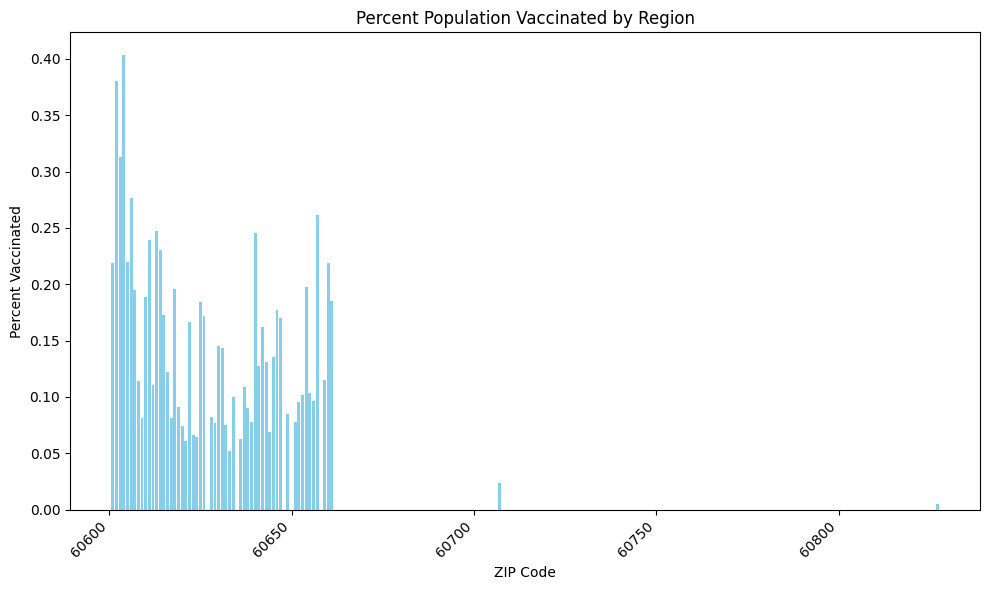

In [29]:
# Sort the data by percentage in descending order for better readability on the chart
df_sorted = df_merge.sort_values(by='Percent', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['ZIP Code'], df_sorted['Percent'], color='skyblue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('ZIP Code')
plt.ylabel('Percent Vaccinated')
plt.title('Percent Population Vaccinated by Region')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


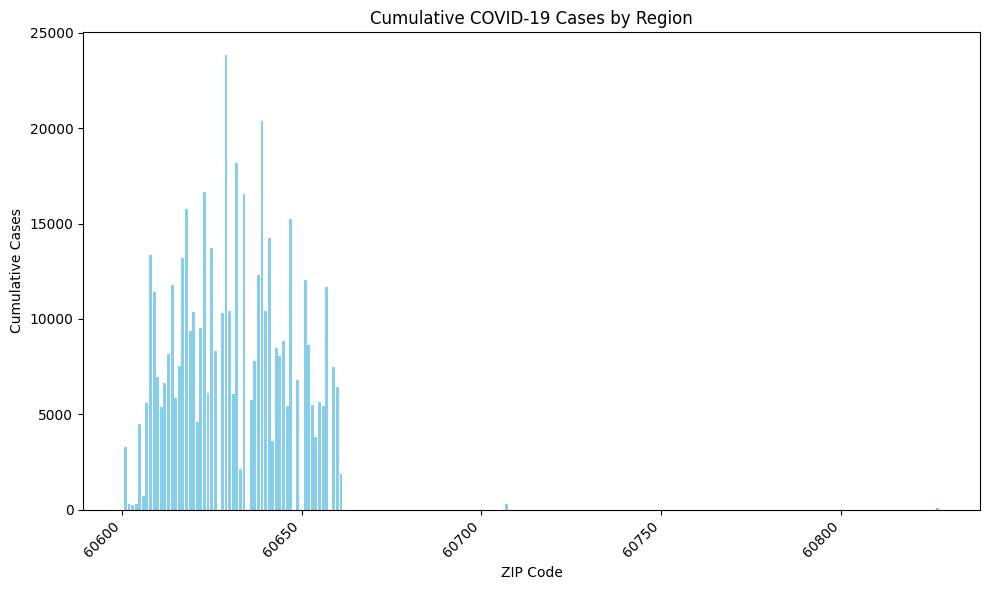

In [30]:
# Sort the data by cumulative cases in descending order for better readability on the chart
df_sorted = df_merge.sort_values(by='Cases - Cumulative', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['ZIP Code'], df_sorted['Cases - Cumulative'], color='skyblue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('ZIP Code')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative COVID-19 Cases by Region')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


*Answer to research question:* 

Based on the observations of the two charts, it's evident that areas with higher vaccination rates tend to have lower case rates. Therefore, the conclusion drawn is that maintaining clean data can potentially provide clearer insights into the relationship between vaccination and case rates.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* 

With more time, I would transition from using the Udacity Workspace to conducting the analysis locally. This would enable me to utilize mapping libraries for creating more insightful visualizations, such as choropleth maps, which can effectively represent geographical patterns in vaccination coverage and case rates across different ZIP code regions. By leveraging local resources, I could also explore more advanced machine learning techniques to predict future trends in COVID-19 transmission based on demographic and vaccination data.

In [32]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Data_Wrangling_Project_Starter.ipynb

[NbConvertApp] Converting notebook Data_Wrangling_Project_Starter.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 552411 bytes to Data_Wrangling_Project_Starter.html
